In [1]:
import pandas as pd
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
from termcolor import colored

In [3]:
#path = 'features_sunday_equalization.csv'
#path = 'features_ignoredWT1WT2_includingDUPandDEL.csv'
path = 'final_19_12_CHO.pickle'
df = pd.read_pickle(os.path.join(r'D:\ISR\Imagens_Membrana', path))

In [4]:
df

,Unnamed: 0,Image,x_manual,y_manual,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,...,Centroid_x,Centroid_y,Circle_x,Circle_y,radius,Distance_nucleus_circle,dist_centr_circle_pts,circle_area/nucleus_area,circle_perimeter,circle_area
0,0,13-3IF_CHO_Branco_Alt.tif,158,513,1297.0,1612.0,144.325902,0.818883,188684.0,145.477255,...,156.922899,515.578258,148.125000,528.250000,43.000000,15.426473,"[56.13544037714804, 31.85353919614206, 56.1354...",4.478647,270.176968,5808.804816
1,1,13-3IF_CHO_Branco_Alt.tif,111,643,3215.0,3965.0,213.438600,0.346665,571434.0,177.739969,...,114.377294,643.571073,108.714286,640.571429,43.142857,6.408395,"[39.94133391387402, 47.005688242348256, 39.941...",1.818807,271.074566,5847.465640
2,2,13-3IF_CHO_Branco_Alt.tif,431,480,3590.0,4524.0,225.994949,0.653891,658553.0,183.440947,...,438.058774,481.744847,436.000000,493.500000,43.000000,11.934076,"[54.29420043649383, 31.811536430408967, 54.294...",1.618051,270.176968,5808.804816
3,3,13-3IF_CHO_Branco_Alt.tif,563,465,3929.0,5130.0,244.894444,0.791719,612955.0,156.007890,...,565.176126,464.542377,562.000000,479.000000,44.000000,14.802386,"[58.54384204921843, 29.712620689560495, 58.543...",1.548008,276.460154,6082.123377
4,4,13-3IF_CHO_Branco_Alt.tif,455,549,1482.0,1890.0,154.568542,0.302303,275513.0,185.906208,...,460.054656,545.394737,468.800000,543.200000,45.500000,9.016536,"[43.33978474900988, 48.056108598902036, 43.339...",4.388584,285.884931,6503.882191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,493,94-3IF_CHO_Mut394_Alt.tif,579,732,2573.0,3149.0,203.882251,0.770937,337279.0,131.083949,...,580.978236,735.089390,576.916667,744.166667,45.500000,9.944511,"[54.1399733947775, 36.431125240751406, 54.1399...",2.527743,285.884931,6503.882191
494,494,94-3IF_CHO_Mut394_Alt.tif,408,613,1991.0,2704.0,169.438600,0.556729,245117.0,123.112506,...,405.282270,616.110497,397.000000,623.000000,43.000000,10.773173,"[50.57230947675798, 37.04813100110252, 50.5723...",2.917531,270.176968,5808.804816
495,495,94-3IF_CHO_Mut394_Alt.tif,148,430,2831.0,3672.0,208.610173,0.742930,416066.0,146.967856,...,155.590604,432.449664,152.000000,428.000000,40.000000,5.717688,"[35.73120200120075, 44.594451506610554, 35.731...",1.775538,251.327412,5026.548246
496,496,94-3IF_CHO_Mut394_Alt.tif,250,784,3398.0,4440.0,222.994949,0.640016,476706.0,140.290171,...,252.655680,781.209829,250.923077,797.846154,46.153846,16.726303,"[61.84721359118243, 30.32633216008011, 61.8472...",1.969438,289.993168,6692.150031


In [30]:
def plt_hist_and_stats_utest(columns, types, histogram):
    for column in columns:
        #create a new figure
        plt.figure()
        for tp in types:

            #subset to the type
            subset = df[df.Image.str.contains(tp)]

            #compute some statistics
            aux = subset[column].describe()

            #Draw the density plot
            sns.distplot(subset[column], hist = histogram, kde = True, kde_kws = {'linewidth': 3},
                        label = tp+r'(Mean = %0.2f, STD %0.2f, Max = %0.2f, Min = %0.2f)' % (aux['mean'], aux['std'], aux['max'], aux['min']))
            plt.legend(prop = {'size': 10}, title = 'Cell Type')
            plt.title(column)
            plt.xlabel(column)
            plt.ylabel('Density')
            
        import scipy.stats as stats
        subset1  = df[df.Image.str.startswith(types[0])]
        subset2 = df[df.Image.str.startswith(types[1])]
        u_statistic, pVal = stats.mannwhitneyu(subset1[columns[0]], subset2[columns[0]], alternative = 'two-sided')
        print('THE P-VALUE IS:')
        print(pVal)
        if pVal < 0.05:
            aux = '\033[1m' + ' is ' + '\033[0m'
            aux = colored(aux, 'blue') 
            hipothesis =' H1: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        else:
            aux = '\033[1m' + ' is not ' + '\033[0m'
            aux = colored(aux, 'blue')
            hipothesis = ' H0: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        print('Hipothesis:' + hipothesis)
        #print(u_statistic)

In [56]:
typess = ['Mock','Del384','Dup4146','Mut394', 'WT', 'Branco']
vs = typess[0]

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


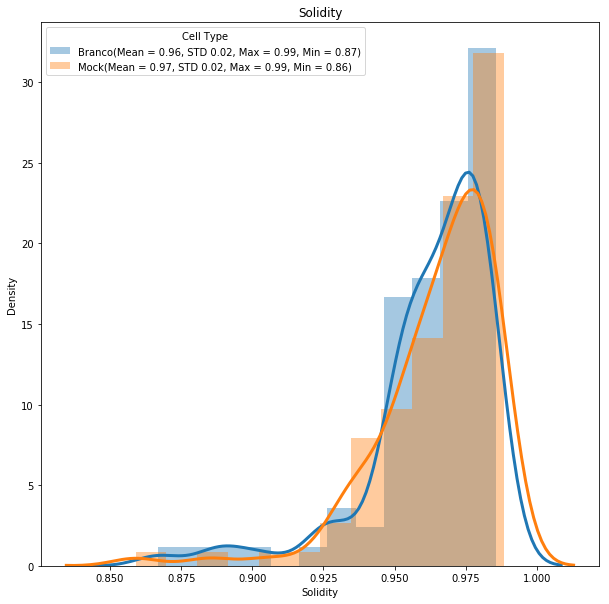

In [57]:
types = ['Branco', vs]
columns = ['Solidity']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


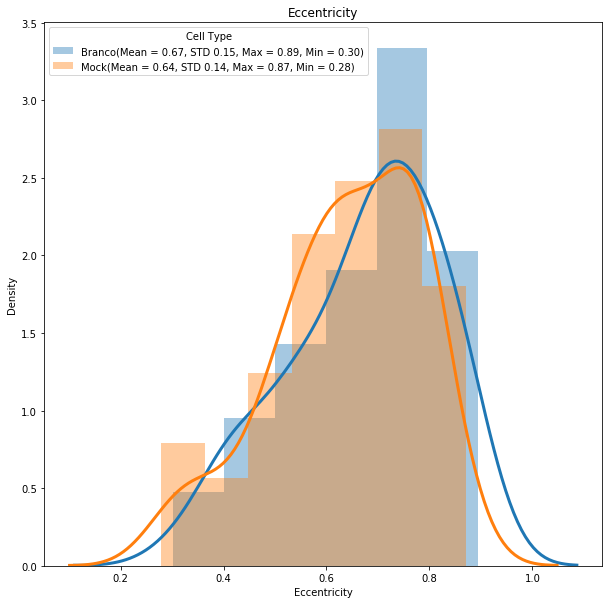

In [58]:
types = ['Branco', vs]
columns = ['Eccentricity']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


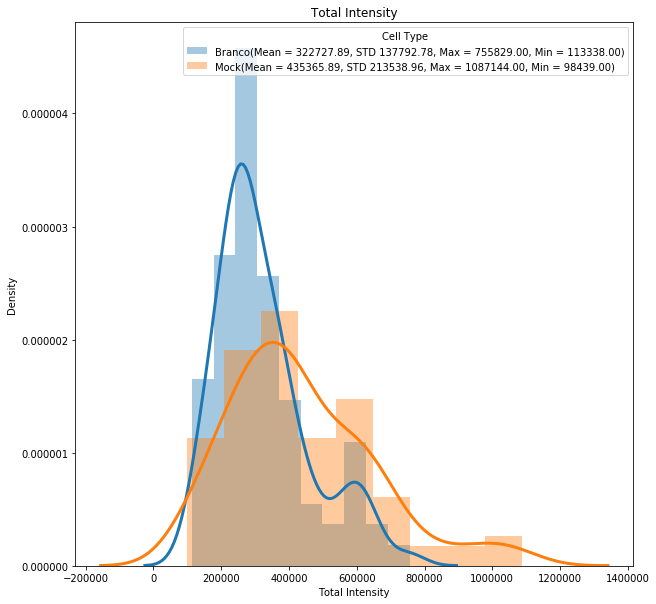

In [59]:
types = ['Branco', vs]
columns = ['Total Intensity']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


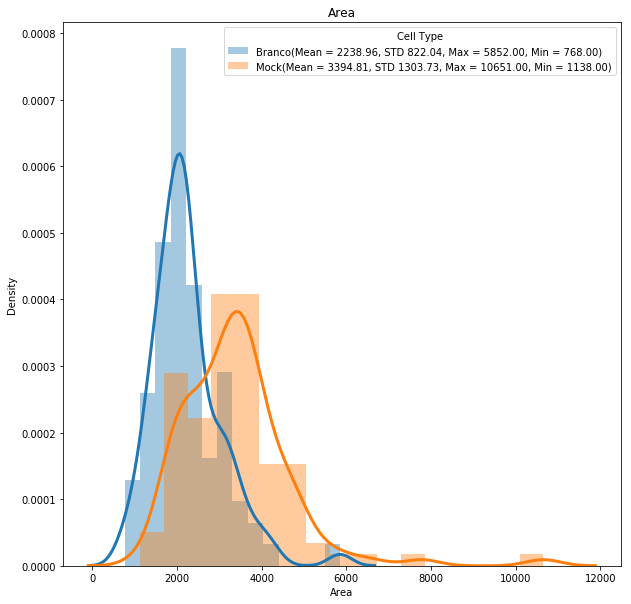

In [62]:
types = ['Branco', vs]
columns = ['Area']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


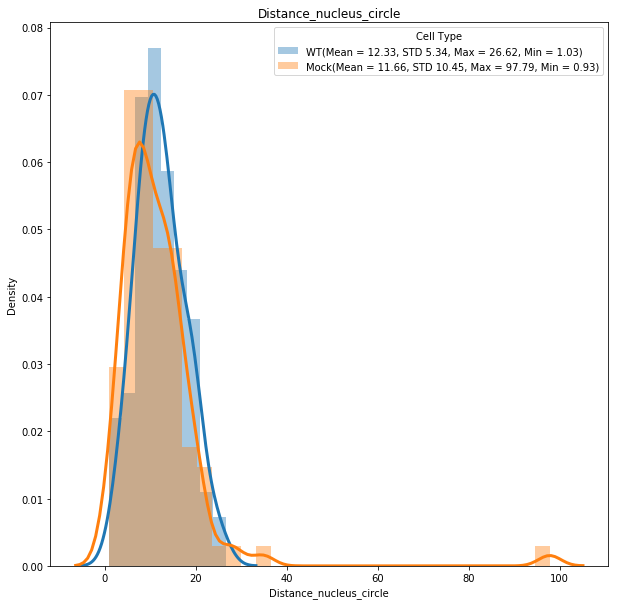

In [61]:
types = ['WT', vs]
columns = ['Distance_nucleus_circle']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

In [4]:
def stats_pval_table(columns, types):
        import scipy.stats as stats
        subset1  = df[df.Image.str.contains(types[0])]
        subset2 = df[df.Image.str.contains(types[1])]
        u_statistic, pVal = stats.mannwhitneyu(subset1[columns[0]], subset2[columns[0]], alternative = 'two-sided')
        return pVal

In [49]:
#types = [['WT', 'Del'], ['WT', 'Dup'], ['WT', 'MUT 88'], ['WT', 'MUT 394'], ['WT', 'MUT 635'], ['WT', 'MUT 760C'], 
 #        ['WT', 'MUT 977'], ['WT', 'MUT 1108'], ['WT', 'MUT 2450'], ['WT', 'MUT 2519']]
    
    
    
    
types = [[typess[5], typess[0]], [typess[5], typess[1]], [typess[5], typess[2]], [typess[5], typess[3]], [typess[5], typess[4]]]    
    
columns = [['Area'], ['BBox_Area'], ['Perimeter'], ['Eccentricity'], ['Total Intensity'], ['Mean Intensity'], ['Solidity'],
           ['Entropy'], ['Distance_nucleus_circle'], ['radius']]
plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd


pval_table = pd.DataFrame(columns = ["Comparison", "Area", "BBox_Area", "Perimeter", "Eccentricity", "Total Intensity", "Mean Intensity", 
                                     "Solidity", "Entropy", "Distance_nucleus_circle", "radius"])

for tp in types:
    pval_list = []
    for column in columns:
        pval = stats_pval_table(column, tp)
        pval_list.append(pval)
    comparison = tp[0] + ' vs ' + tp[1]
    area = pval_list[0]
    bbox_area = pval_list[1]
    perimeter = pval_list[2]
    eccentricity = pval_list[3]
    total_int = pval_list[4]
    mean_int = pval_list[5]
    solidity = pval_list[6]
    entropy = pval_list[7]
    dis_n_c = pval_list[8]
    radius = pval_list[9]
        
    res = {"Comparison": comparison, "Area": area, "BBox_Area": bbox_area, "Perimeter": perimeter, "Eccentricity": eccentricity,
          "Total Intensity": total_int, "Mean Intensity": mean_int, "Solidity": solidity, "Entropy": entropy, 
           "Distance_nucleus_circle": dis_n_c, "radius": radius}

    row = len(pval_table)
    pval_table.loc[row] = res


In [50]:
pval_table

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle,radius
0,Branco vs Mock,1.009594e-12,1.697348e-13,1.094302e-13,0.101625,0.000051,0.021580,0.312078,0.000078,0.000137,0.290676
1,Branco vs Del384,4.581354e-04,1.302585e-03,2.731373e-05,0.792299,0.000036,0.081569,0.390188,0.677572,0.018469,0.000013
2,Branco vs Dup4146,3.715771e-01,3.533797e-01,2.161824e-01,0.238313,0.021289,0.004408,0.571639,0.178912,0.652282,0.275884
3,Branco vs Mut394,1.267670e-07,1.210820e-07,1.962774e-08,0.580606,0.000222,0.134532,0.837219,0.051293,0.096302,0.185679
4,Branco vs WT,3.951673e-04,1.031527e-03,4.843470e-04,0.380523,0.045221,0.008169,0.847841,0.825638,0.020289,0.157518


In [51]:
pval_table < 0.05

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle,radius
0,True,True,True,True,False,True,True,False,True,True,False
1,True,True,True,True,False,True,False,False,False,True,True
2,True,False,False,False,False,True,True,False,False,False,False
3,True,True,True,True,False,True,False,False,False,False,False
4,True,True,True,True,False,True,True,False,False,True,False


In [15]:
pval_table < 0.01

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle
0,True,False,False,False,False,True,True,False,True,False
1,True,True,True,True,False,True,True,False,True,False
2,True,True,True,True,False,True,True,False,False,False
3,True,True,True,True,False,True,True,True,False,False
4,True,False,False,True,False,False,False,False,False,False


In [16]:
pval_table < 0.001

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle
0,True,False,False,False,False,False,True,False,True,False
1,True,True,True,True,False,True,True,False,True,False
2,True,True,True,True,False,False,True,False,False,False
3,True,True,True,True,False,False,True,True,False,False
4,True,False,False,False,False,False,False,False,False,False


In [17]:
pval_table < 0.0001

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle
0,True,False,False,False,False,False,True,False,True,False
1,True,True,True,True,False,True,False,False,True,False
2,True,True,True,True,False,False,True,False,False,False
3,True,True,True,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False


In [8]:
## tamanho da célula e do núcleo

## FEATURES RELATED TO SIZE

typess = ['Branco', 'Mock','Del384','Dup4146','Mut394', 'WT']

types = [[typess[5], typess[0]], [typess[5], typess[1]], [typess[5], typess[2]], [typess[5], typess[3]], [typess[5], typess[4]], 
         ['Branco','Mock']]    
    
columns = [['Area'], ['Perimeter'], ['circle_area'],['circle_perimeter'], ['radius']]
plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd


pval_table = pd.DataFrame(columns = ["Comparison", "Nucleus Area", "Nucleus Perimeter", "Cell Area", 
                                     "Cell Perimeter", "Cell Radius"])

for tp in types:
    pval_list = []
    for column in columns:
        pval = stats_pval_table(column, tp)
        pval_list.append(pval)
    comparison = tp[0] + ' vs ' + tp[1]
    area = pval_list[0]
    perimeter = pval_list[1]
    c_area = pval_list[2]
    c_perimeter = pval_list[3]
    c_radius = pval_list[4]
        
    res = {"Comparison": comparison, "Nucleus Area": area, "Nucleus Perimeter": perimeter, 
           "Cell Area": c_area, "Cell Perimeter": c_perimeter, "Cell Radius": c_radius}

    row = len(pval_table)
    pval_table.loc[row] = res


In [9]:
pval_table

,Comparison,Nucleus Area,Nucleus Perimeter,Cell Area,Cell Perimeter,Cell Radius
0,WT vs Branco,3.951673e-04,4.843470e-04,0.157518,0.157518,0.157518
1,WT vs Mock,2.466772e-06,1.659773e-06,0.929360,0.929360,0.929360
2,WT vs Del384,3.588660e-01,1.017349e-01,0.000855,0.000855,0.000855
3,WT vs Dup4146,5.496686e-02,8.885782e-02,0.981931,0.981931,0.981931
4,WT vs Mut394,2.183751e-02,1.396496e-02,0.979744,0.979744,0.979744
5,Branco vs Mock,1.009594e-12,1.094302e-13,0.290676,0.290676,0.290676


In [10]:
def obtain_columns(columns, typee):
        import scipy.stats as stats
        subset1  = df[df.Image.str.contains(typee)]
        subset1 = subset1[columns]
        return subset1

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mut394 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=9.797e-01 U_stat=4.762e+03
Branco v.s. Mock: Mann-Whitney-Wilcoxon test two-sided P_val=2.907e-01 U_stat=4.064e+03
Dup4146 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=9.819e-01 U_stat=3.079e+03
Del384 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=8.548e-04 U_stat=3.150e+03
Mock v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=9.294e-01 U_stat=5.003e+03
Branco v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=1.575e-01 U_stat=3.582e+03


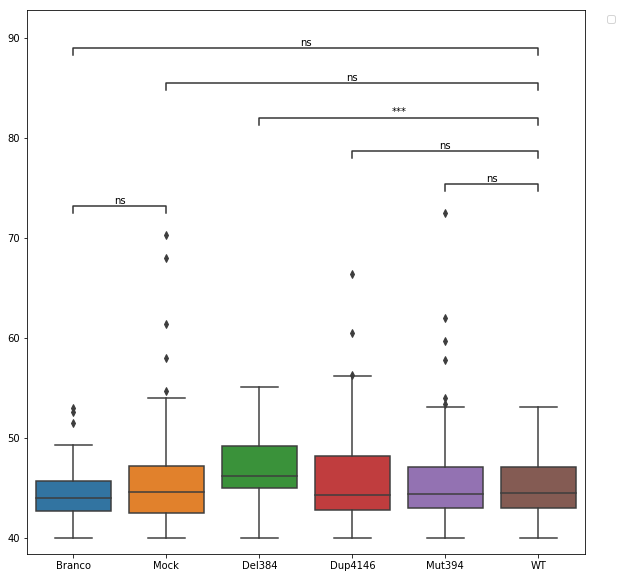

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


typess = ['Branco', 'Mock','Del384','Dup4146','Mut394', 'WT']

    
columns = [['Area'], ['Perimeter'], ['circle_area'],['circle_perimeter'], ['radius']]

columns = [['radius']]

plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd




for column in columns:
    plt.figure()
    filename = []
    table = pd.DataFrame(columns = [])
    for tp in typess:
        columnn = obtain_columns(column, tp)
        
        
        a = []
        
        for i in range(0, len(columnn.to_numpy())):
            a.append(columnn.to_numpy()[i][0])
        
        
        
        table_aux = pd.DataFrame({tp: a})
        #table_aux[tp] = a
        
        table = pd.concat([table,table_aux], axis=1)
        
    
    ax = sns.boxplot(data=table)
    add_stat_annotation(ax, data=table,
    box_pairs=[(typess[5], typess[0]),
                             (typess[5], typess[1]),
                             ( typess[5],  typess[2]),
                            ( typess[5],  typess[3]),
                             (typess[5],  typess[4]),
              ('Branco','Mock')],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
    plt.rcParams['figure.figsize'] = (20,20)
    #plt.title(columns[0])
    plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

In [19]:
def stats_pval_table(columns, types):
    


    import scipy.stats as stats
    subset1  = df[df.Image.str.contains(types[0])]
    subset2 = df[df.Image.str.contains(types[1])]

    if columns[0] == 'dist_centr_circle_pts':
        
        a1= subset1["dist_centr_circle_pts"]

        aux1 = []

        for items in a1.iteritems(): 
                line = items[1]

                for j in range(0, len(line)):
                    aux1.append(line[j])

                    
                    
                    
        a2= subset2["dist_centr_circle_pts"]

        aux2 = []

        for items in a2.iteritems(): 
                line = items[1]

                for j in range(0, len(line)):
                    aux2.append(line[j])            

        u_statistic, pVal = stats.mannwhitneyu(aux1, aux2, alternative = 'two-sided')           
                    
        
    else:

        u_statistic, pVal = stats.mannwhitneyu(subset1[columns[0]], subset2[columns[0]], alternative = 'two-sided')
    return pVal

In [20]:
## features related to relative position and size of the nucleus


typess = ['Branco', 'Mock','Del384','Dup4146','Mut394', 'WT']

types = [[typess[5], typess[0]], [typess[5], typess[1]], [typess[5], typess[2]], [typess[5], typess[3]], [typess[5], typess[4]], 
         ['Branco','Mock']]    
    
columns = [['Distance_nucleus_circle'], ['dist_centr_circle_pts'], ['circle_area/nucleus_area']]
plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd


pval_table = pd.DataFrame(columns = ["Comparison", "Distance_nucleus_circle", "Distance_nucleus_circle_points", 
                                     "Cell_Area/Nucleus_Area"])

for tp in types:
    pval_list = []
    for column in columns:
        pval = stats_pval_table(column, tp)
        pval_list.append(pval)
    comparison = tp[0] + ' vs ' + tp[1]
    dist_n_c = pval_list[0]
    dist_n_c_pts = pval_list[1]
    c_area_n_area = pval_list[2]
        
    res = {"Comparison": comparison, "Distance_nucleus_circle": dist_n_c, "Distance_nucleus_circle_points": dist_n_c_pts, 
                                     "Cell_Area/Nucleus_Area": c_area_n_area}

    row = len(pval_table)
    pval_table.loc[row] = res

In [21]:
pval_table

,Comparison,Distance_nucleus_circle,Distance_nucleus_circle_points,Cell_Area/Nucleus_Area
0,WT vs Branco,0.020289,2.403071e-04,2.825364e-03
1,WT vs Mock,0.045854,1.313762e-09,3.818480e-06
2,WT vs Del384,0.699011,6.136256e-110,6.115389e-01
3,WT vs Dup4146,0.014000,1.112050e-19,9.226551e-03
4,WT vs Mut394,0.654171,2.004381e-07,1.018792e-01
5,Branco vs Mock,0.000137,1.485211e-24,1.982480e-11


In [22]:
def obtain_columns(columns, typee):
        import scipy.stats as stats
        subset1  = df[df.Image.str.contains(typee)]
        subset1 = subset1[columns]
        
        
        if columns[0] == 'dist_centr_circle_pts':
            
            aux = []
    
            for items in subset1.iteritems(): 
                    line = items[1]
                
                    for j in range(0, len(line)):
                        aux.append(line[j])
                        
            subset1 = aux            
        
        
        return subset1

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mut394 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=6.542e-01 U_stat=4.929e+03
Branco v.s. Mock: Mann-Whitney-Wilcoxon test two-sided P_val=1.375e-04 U_stat=5.900e+03
Dup4146 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=1.400e-02 U_stat=3.778e+03
Del384 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=6.990e-01 U_stat=2.259e+03
Mock v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=4.585e-02 U_stat=4.217e+03
Branco v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=2.029e-02 U_stat=4.897e+03


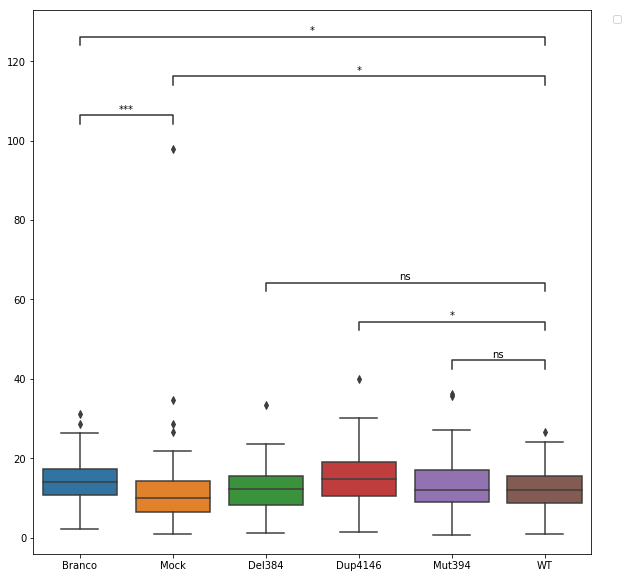

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


typess = ['Branco', 'Mock','Del384','Dup4146','Mut394', 'WT']


columns = [['Distance_nucleus_circle'], ['dist_centr_circle_pts'], ['circle_area/nucleus_area']]

columns = [['Distance_nucleus_circle']]

plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd




for column in columns:
    plt.figure()
    filename = []
    table = pd.DataFrame(columns = [])
    for tp in typess:
        columnn = obtain_columns(column, tp)
        
        
        a = []
        
        for i in range(0, len(columnn.to_numpy())):
            a.append(columnn.to_numpy()[i][0])
        
        
        
        table_aux = pd.DataFrame({tp: a})
        #table_aux[tp] = a
        
        table = pd.concat([table,table_aux], axis=1)
        
    
    ax = sns.boxplot(data=table)
    add_stat_annotation(ax, data=table,
    box_pairs=[(typess[5], typess[0]),
                             (typess[5], typess[1]),
                             ( typess[5],  typess[2]),
                            ( typess[5],  typess[3]),
                             (typess[5],  typess[4]),
              ('Branco','Mock')],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
    plt.rcParams['figure.figsize'] = (20,20)
    #plt.title(columns[0])
    plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

In [42]:
import numpy as np

def plt_new(types):
        plt.figure()
        for tp in types:

            #subset to the type
            subset = df[df.Image.str.contains(tp)]

            
            a = subset["dist_centr_circle_pts"]
            print(len(a))
            
            
#             aux = []

            aux = []
    
            for items in a.iteritems(): 
                    line = items[1]
                
                    for j in range(0, len(line)):
                        aux.append(line[j])

            
#             for i in range(a):
#                 for j in range(a[i]):
#                     aa = a[i]
#                     aux.append(aa[j])
                

            #Draw the density plot
            sns.distplot(aux, hist=True, kde = False)
            plt.legend(prop = {'size': 10}, title = 'Cell Type')
            plt.title(column)
            plt.xlabel(column)
            plt.ylabel('Counts')
         

No handles with labels found to put in legend.


['Branco']
85


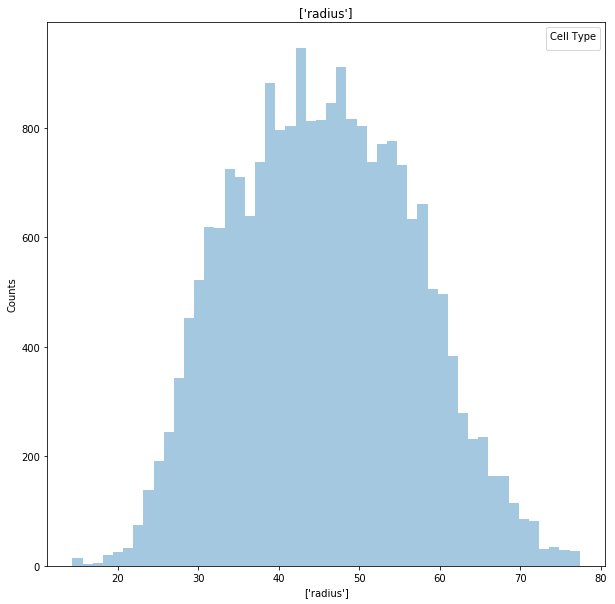

In [43]:
types = [typess[0]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)

No handles with labels found to put in legend.


['Mock']
105


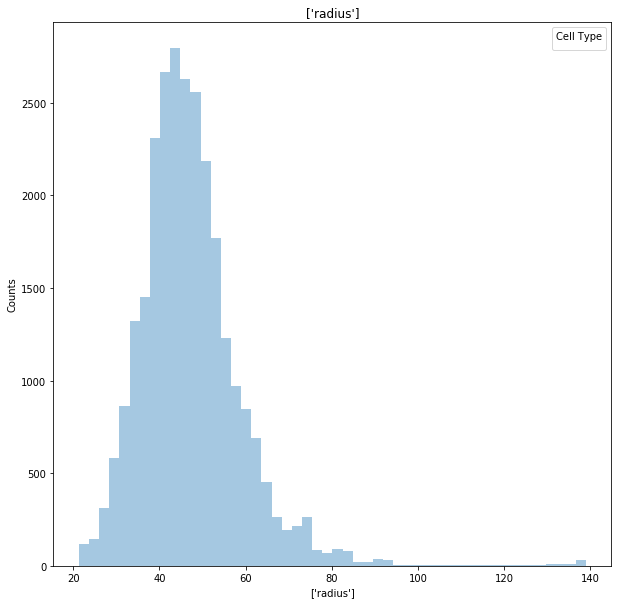

In [44]:
types = [typess[1]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)

No handles with labels found to put in legend.


['Del384']
49


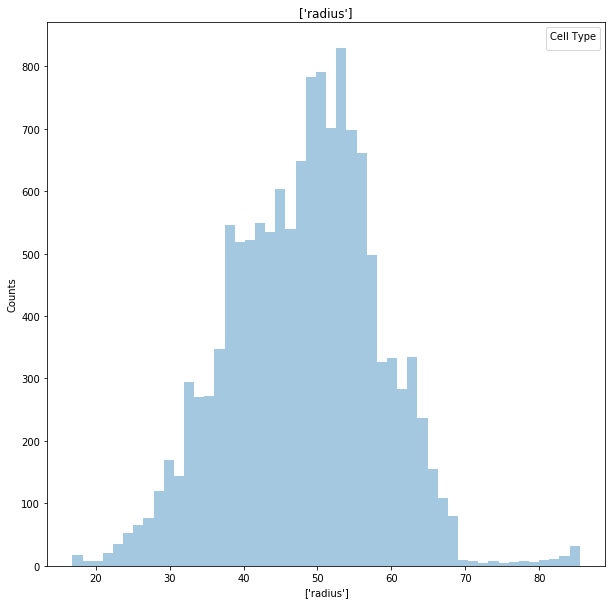

In [45]:
types = [typess[2]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)

No handles with labels found to put in legend.


['Dup4146']
64


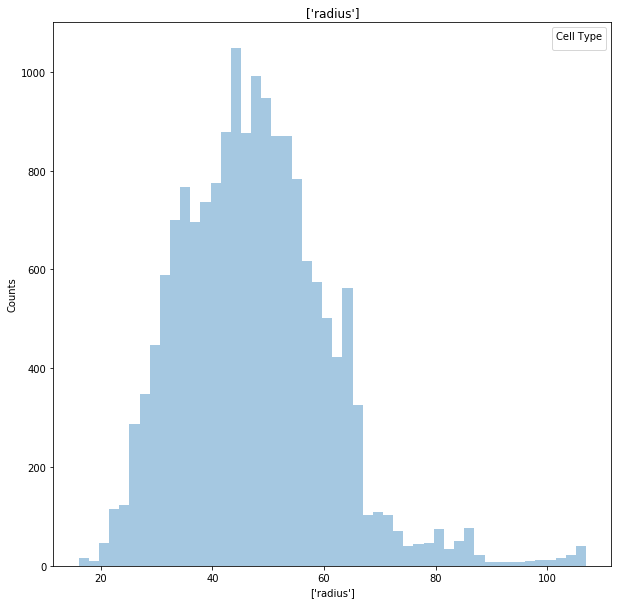

In [46]:
types = [typess[3]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)

No handles with labels found to put in legend.


['Mut394']
99


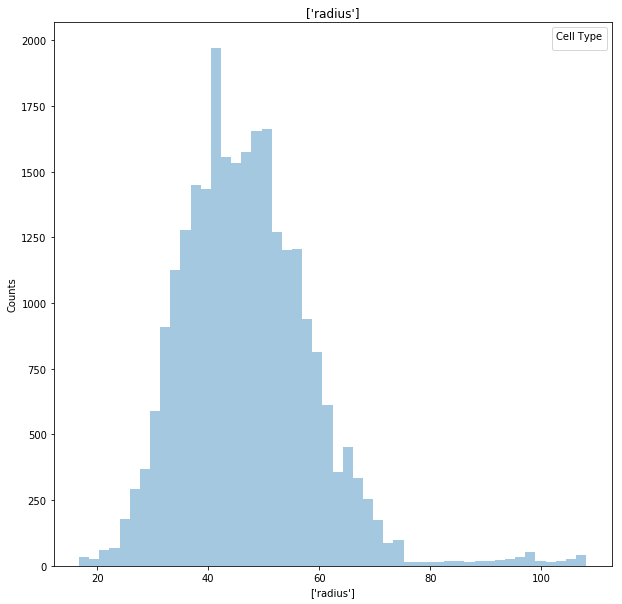

In [47]:
types = [typess[4]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)